# Attack Pattern

In [1]:
# Importing the required packages
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings('ignore')
from pandas import ExcelWriter

In [2]:
# Creating the path to read the input file
home_path = os.path.expanduser("~")
data_path = home_path+"\\final\\Data\\*"

In [3]:
# Looping through each filename in above path and selecting the required file
for file in glob.glob(data_path):
    with open(file, errors='ignore') as source:
        ana_2_data = pd.read_csv(source, low_memory=False, encoding='ISO-8859-1')

# Eliminating NAN from latitude values        
ana_2_data = ana_2_data[np.isfinite(ana_2_data.latitude)]

ana_2_data.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,2.000000e+11,2001,1,0,"January 8-9, 2001",0,NaN,45,Colombia,3,...,Sources imply that the attack may have taken p...,"""Twenty murdered in attacks across Colombia at...","""Colombia violence leaves 35 dead,"" Agence Fra...",NaN,UMD Schmid 2012,-9,-9,0,-9,NaN
1,2.000000e+11,2001,1,1,NaN,0,NaN,228,Yemen,10,...,NaN,âBomb Blast Outside Yemeni News Agency Offic...,âAuthorities Arrest Suspects in Aden Bombing...,NaN,CETIS,-9,-9,0,-9,NaN


In [4]:
# Calculating count of terror activities yearwise
count_yearwise = pd.DataFrame(ana_2_data.groupby(['iyear'])['eventid'].count())
count_yearwise = count_yearwise.rename(columns = {'eventid':'Number_of_Attacks'})
# Calculating mean of terror activities yearwise
mean_yearwise = pd.DataFrame(ana_2_data.groupby(['iyear'])['nkill'].mean())
mean_yearwise = mean_yearwise.rename(columns = {'nkill':'Average_Number_of_Deaths'})

# Writing resultant dataframes to excel file
writer = ExcelWriter('ana_2\\excel\\count_yearwise.xlsx')
count_yearwise.to_excel(writer,'Sheet1')
writer.save()

writer = ExcelWriter('ana_2\\excel\\mean_yearwise.xlsx')
mean_yearwise.to_excel(writer,'Sheet1')
writer.save()

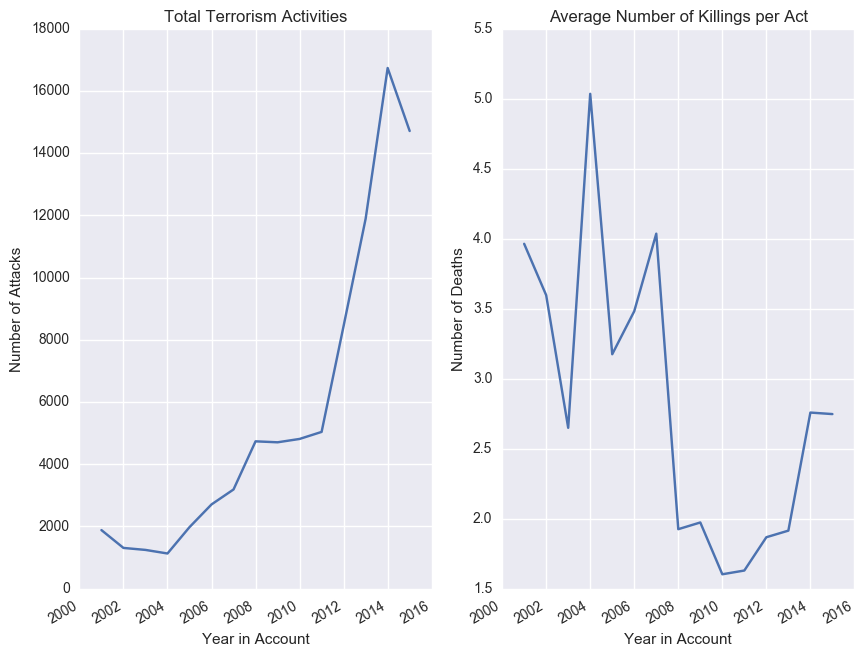

In [5]:
# Creating the plot and subplots
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Plotting the Number of attack yearwise
ax1.set(title = 'Total Terrorism Activities', ylabel = 'Number of Attacks', xlabel = 'Year in Account')
ax1.plot(count_yearwise.Number_of_Attacks)

# Plotting the average number of deaths yearwise
ax2.set(title = 'Average Number of Killings per Act', ylabel = 'Number of Deaths', xlabel = 'Year in Account')
ax2.plot(mean_yearwise.Average_Number_of_Deaths)
fig.autofmt_xdate()

# Saving the plot in png format
plt.savefig('ana_2\\png\\Attacks&Death.png', bbox_inches='tight')

In [6]:
# Creating a list containing unique region names
regions = list(set(ana_2_data.region_txt))
# Creating an empty list to store average death in each region
region_mean_kills = []

# Looping through each region and appending the average deaths in each region to the region_mean_kills
for region in regions:
    region_mean_kills.append(ana_2_data.nkill[ana_2_data.region_txt == region].mean())
    
# Creating a dataset to store region and average number of people dying in that region    
average_death = pd.DataFrame(regions, columns=['Region'])
average_death['Average_Deaths'] = region_mean_kills
average_death['Average_Deaths'] = round(average_death.Average_Deaths)

# Writing resultant dataframe to excel file
writer = ExcelWriter('ana_2\\excel\\average_death.xlsx')
average_death.to_excel(writer,'Sheet1')
writer.save()

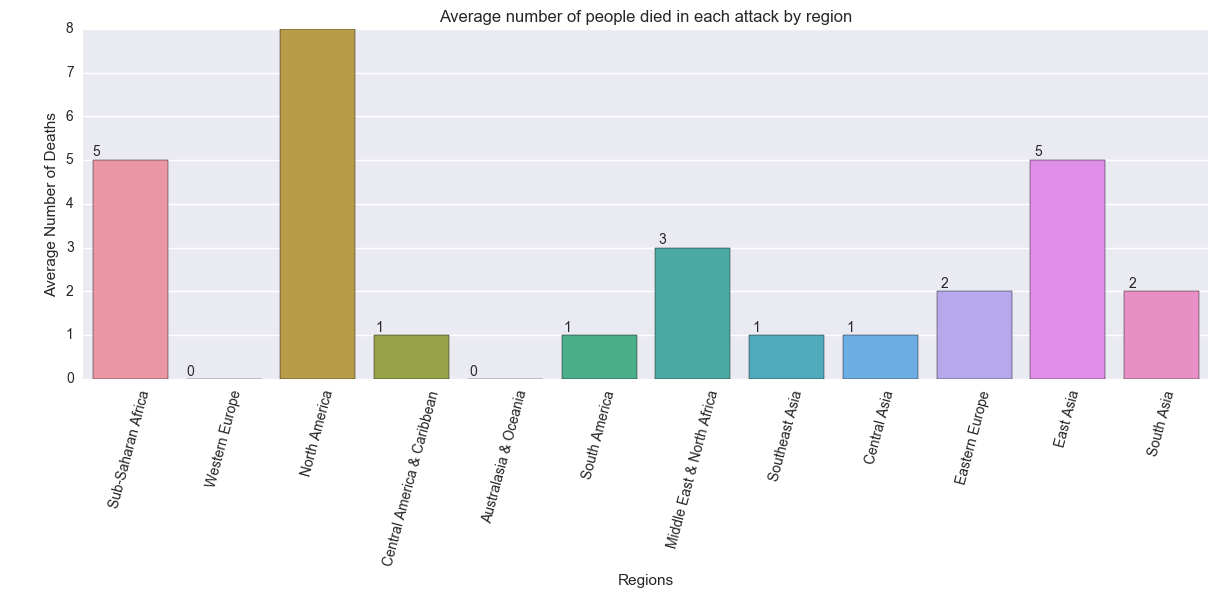

In [7]:
# Creating plot for Average number of people died in each attack by region
fig = plt.figure()
ax = sns.barplot(x = "Region", y = "Average_Deaths", data = average_death)
#ax = average_death.plot(kind="barh")
#ax.invert_yaxis()
ax.set_title('Average number of people died in each attack by region')
ax.set_xlabel("Regions")
ax.set_ylabel("Average Number of Deaths")

# Adjusting the positions of the graph
plt.subplots_adjust(right=2, top=1)

# Rotating the x axis values by 75 degrees to avoid overlapping
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=75)
    
# Displaying the value on top of each bar
for ax in fig.axes:
    for p in ax.patches:
        ax.annotate(str(round(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), ha='left', va='bottom')
        
# Saving the plot in png format        
plt.savefig('ana_2\\png\\AverageNumberofDeaths.png', bbox_inches='tight')

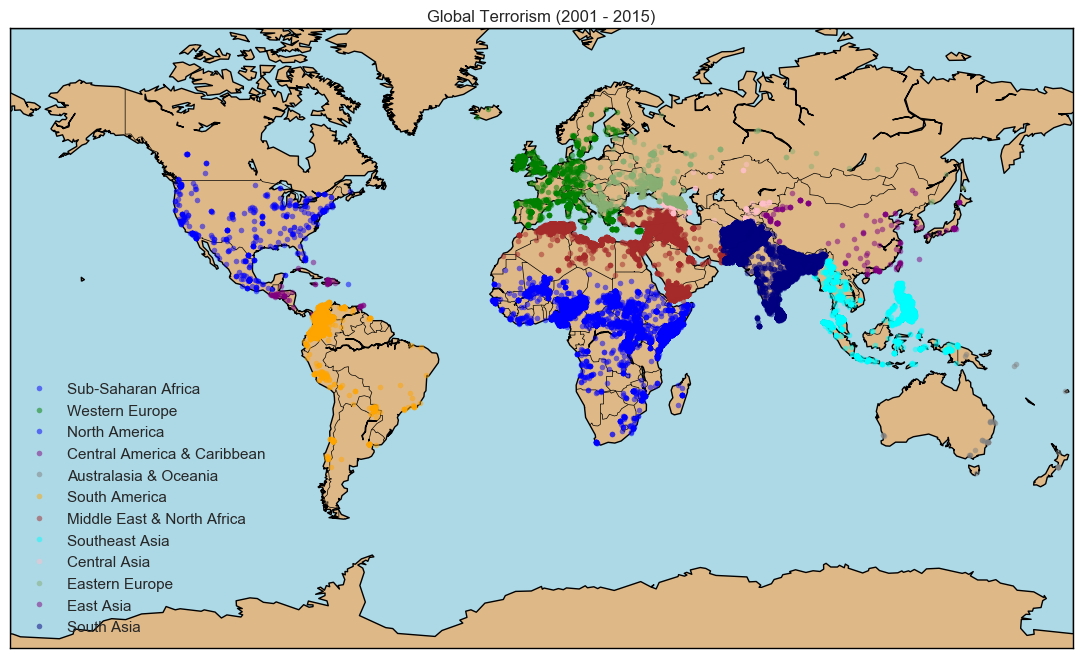

In [8]:
# Creating a list containing some sample colors
colors = ['blue', 'green', 'blue', 'purple', 'gray', 'orange', 'brown','aqua', 'pink', 'sage', 'purple', 'navy']

# Plotting the basemap
plt.figure(figsize=(15,8))
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')

# Creating a function to plot the terror activities on the basemap for each region
def pltpoints(region, color = None, label = None):
    x, y = m(list(ana_2_data.longitude[ana_2_data.region_txt == region].astype("float")),\
            (list(ana_2_data.latitude[ana_2_data.region_txt == region].astype("float"))))
    points = m.plot(x, y, "o", markersize = 4, color = color, label = label, alpha = .5)
    return(points)

# Passing each region and colors to the pltpoints function and creating the basemap
for i, region in enumerate(regions):
    pltpoints(region, color = colors[i], label = region)  

# Creating title and legends for the basemap and displaying the basemap
plt.title("Global Terrorism (2001 - 2015)")
plt.legend(loc ='lower left', prop= {'size':11})
plt.show()

## *Conclusion:*
### *It can be seen from the above graphs that:*
- Not only has the number of terrorism acts increased over time, but also the number of 
  deaths per act has been on the rise. This could possibly due to the fact that there 
  being more densely populated areas over time.
- We can see that terrorism is widespread, but judging by where the points are located, 
  and quite obviously, it mostly affects areas that are more densely populated.
- We can also note, that on average, every terror attack in North America claims 8 lives.